In [1]:
%matplotlib inline
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# Brazo robótico

Sea un brazo robótico con dos articulaciones rotacionales y que se mueve en un plano bidimensional como se muestra en la siguiente imagen

<img src="img/robot_arm_two_dof.png" width="500">

Las características mecánicas del brazo son:

- $L_1 = L_2 = 1$
- $\theta_1 \in [0°, 180°]$
- $\theta_2 \in [-90°, 90°]$

La función de cinemática directa (*forward kinematic*) del brazo robótico es aquella que 

> Dado el largo y ángulo de los segmentos retorna la posición en coordenadas cartesianas de las articulaciones

El código de esta función se muestra a continuación:

In [2]:
def forward_kinematics(theta, lengths):
    deg_to_rad = lambda degrees : (float(degrees)/180)*np.pi
    elbow_x = lengths[0]*np.cos(deg_to_rad(theta[0]))
    hand_x = elbow_x + lengths[1]*np.cos(deg_to_rad(theta[0] + theta[1]))
    elbow_y = lengths[0]*np.sin(deg_to_rad(theta[0]))
    hand_y = elbow_y + lengths[1]*np.sin(deg_to_rad(theta[0] + theta[1]))
    return np.array([elbow_x, elbow_y]), np.array([hand_x, hand_y])

La siguiente gráfica muestra tres posibles configuraciones del brazo

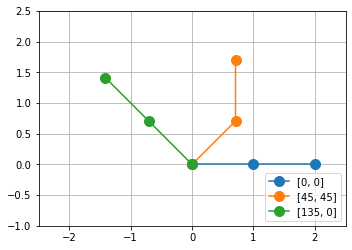

In [3]:
def plot_robot_arm(ax, positions, **kwargs):
    label = kwargs['label'] if 'label' in kwargs else None
    elbow_position, hand_position = positions
    ax.plot([0.0, elbow_position[0], hand_position[0]], 
            [0.0, elbow_position[1], hand_position[1]],
            marker='o', markersize=10, label=label)
    ax.grid('on')
    ax.set_xlim([-2.5, 2.5])
    ax.set_ylim([-1, 2.5])
    ax.set_aspect('equal')
    
arm_dimensions = (1, 1)
fig, ax = plt.subplots(figsize=(5, 4), tight_layout=True)
for angles in [[0, 0], [45, 45], [135, 0]]:
    plot_robot_arm(ax, forward_kinematics(angles, arm_dimensions), label=angles)
ax.legend(loc=4);

El objetivo de esta actividad es resolver el problema de la cinemática inversa del brazo robótico: 

> Dada una posición en el espacio, retornar los ángulos de las articulaciones tal que la mano (extremo) llegue a dicha posición

Este es un problema clásico de control que a diferencia de la cinemática directa no tiene solución analítica directa. Utilice `scipy.optimize` para resolverlo considerando lo siguiente

- Utilice como variables de decisión los ángulos de las articulaciones (los largos del brazo son fijos)
- Utilice como función de costo la norma euclidiana de la resta entre el vector de posición objetivo y el vector de la posición de la mano del robot
- Tome en cuenta las limitaciones mecánicas del robot para escribir restricciones apropiadas

Pruebe su rutina con las siguientes posiciones objetivo

- (1, 1)
- (1.4, 1.4)
- (-1.4, 1.4)
- (-1.5, 0.5)
- (-1.0, 0.5)

Utilice siempre (0, 0) como ángulos iniciales. En cada caso imprima y visualice la posición alcanzada por la mano y discuta si es factible llegar a la posición objetivo